# Sales Dataset Analysis

This project demonstrates how to use SQLite with Python to store, query, and visualize sales data. The workflow includes:

- Creating a SQLite database and table for sales data
- Inserting sample sales records
- Querying total quantity and revenue per product
- Visualizing the results using Matplotlib

## Requirements

- Python 3.x
- pandas
- matplotlib

## Importing sqlite and other libraries

In [80]:
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt


## Connection 

In [81]:
conn = sqlite.connect("sales_dataset.db")
cursor = conn.cursor()


## CREATING DATABASE

In [ ]:

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_dataset(
        id INTEGER PRIMARY KEY,
        Product TEXT,
        Quantity INTEGER,
        Price REAL
)
''')

## SAMPLE DATA

In [86]:
sample_data = [
    ("Product A", 10, 15.0),
    ("Product B", 5, 25.0),
    ("Product C", 8, 12.5),
    ("Product A", 7, 15.0),
    ("Product F", 3, 25.0),
    ("Product C", 10, 45.0),
    ("Product D", 5, 5.0),
    ("Product A", 8, 52.5),
    ("Product B", 7, 55.0),
    ("Product C", 3, 21.0)
]

## Query Total Quantity

In [ ]:
# Check if the table is empty before inserting to avoid duplicate inserts and locking
cursor.execute("SELECT COUNT(*) FROM sales_dataset")
count = cursor.fetchone()[0]
if count == 0:
    cursor.executemany("INSERT INTO sales_dataset(Product, Quantity, Price) VALUES(?, ?, ?)", sample_data)
    conn.commit()

query = '''
SELECT 
    product,
    SUM(quantity) as TOTAL_QUANTITY,
    SUM(PRICE) as TOTAL_PRICE
FROM 
    sales_dataset
GROUP BY Product
'''

df = pd.read_sql_query(query, conn)

print("Sales Summary:")
print(df)

Sales Summary:
     Product  TOTAL_QUANTITY  TOTAL_PRICE
0  Product A              35         97.5
1  Product B              17        105.0
2  Product C              29         91.0
3  Product D              15         50.0
4  Product E               5          5.0
5  Product F              14        102.5
6  Product G               7         55.0
7  Product H               3         21.0
8  Product L               7         15.0


## Generating Charts

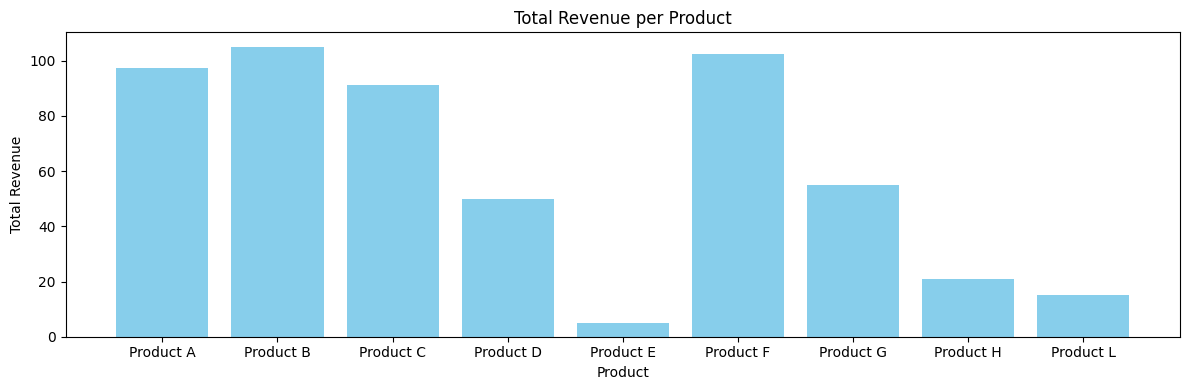

In [93]:
plt.figure(figsize=(12,4))
plt.bar(df['Product'], df['TOTAL_PRICE'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.title("Total Revenue per Product")
plt.tight_layout()
plt.show()